In [2]:
import tensorflow as tf
#输入，shape=[c,h,w]=[2,5,5]
input_data=[
              [[1,0,1,2,1],
               [0,2,1,0,1],
               [1,1,0,2,0],
               [2,2,1,1,0],
               [2,0,1,2,0]],

               [[2,0,2,1,1],
                [0,1,0,0,2],
                [1,0,0,2,1],
                [1,1,2,1,0],
                [1,0,1,1,1]],

            ]
#卷积核，shape=[in_c,k,k]=[2,3,3]
weights_data=[ 
               [[ 1, 0, 1],
                [-1, 1, 0],
                [ 0,-1, 0]],
               [[-1, 0, 1],
                [ 0, 0, 1],
                [ 1, 1, 1]] 
             ]

def get_shape(tensor):
    [s1,s2,s3]= tensor.get_shape() 
    s1=int(s1)
    s2=int(s2)
    s3=int(s3)
    return s1,s2,s3
def chw2hwc(chw_tensor): 
    [c,h,w]=get_shape(chw_tensor) 
    cols=[]

    for i in range(c):
        #每个通道里面的二维数组转为[w*h,1]即1列 
        line = tf.reshape(chw_tensor[i],[h*w,1])
        cols.append(line)

    #横向连接，即将所有竖直数组横向排列连接
    input = tf.concat(cols,1)#[w*h,c]
    #[w*h,c]-->[h,w,c]
    input = tf.reshape(input,[h,w,c])
    return input

def hwc2chw(hwc_tensor):
    [h,w,c]=get_shape(hwc_tensor) 
    cs=[] 
    for i in range(c): 
        #[h,w]-->[1,h,w] 
        channel=tf.expand_dims(hwc_tensor[:,:,i],0)
        cs.append(channel)
    #[1,h,w]...[1,h,w]---->[c,h,w]
    input = tf.concat(cs,0)#[c,h,w]
    return input
def tf_depthwise(input,weights ):
    depthwise=tf.nn.depthwise_conv2d( input, weights, [1, 1, 1, 1], padding='SAME' ) 
    return depthwise
def main(): 
    const_input = tf.constant(input_data , tf.float32)
    const_weights = tf.constant(weights_data , tf.float32 ) 
    input = tf.Variable(const_input,name="input")
    #[2,5,5]------>[5,5,2]
    input=chw2hwc(input)
    #[5,5,2]------>[1,5,5,2]
    input=tf.expand_dims(input,0) 
    weights = tf.Variable(const_weights,name="weights")
    #[2,3,3]-->[3,3,2]
    weights=chw2hwc(weights)
    #[3,3,2]-->[3,3,2,1]
    weights=tf.expand_dims(weights,3) 
    print(weights.get_shape().as_list())

    #[b,h,w,c]
    conv=tf_depthwise(input,weights )
    rs=hwc2chw(conv[0]) 

    init=tf.global_variables_initializer()
    sess=tf.Session()
    sess.run(init)
    conv_val = sess.run(rs)

    print(conv_val) 


if __name__=='__main__':
    main()

[3, 3, 2, 1]
[[[ 1. -3.  0.  1. -2.]
  [-1.  3.  1. -1.  3.]
  [ 1. -1.  0.  3. -2.]
  [ 1.  1.  1. -2.  1.]
  [ 4.  1.  4.  2. -1.]]

 [[ 1.  3.  2.  3.  2.]
  [ 2.  1.  3.  4.  2.]
  [ 3.  4.  5.  6.  1.]
  [ 2.  3.  5.  4.  0.]
  [ 1.  2.  1. -1. -1.]]]


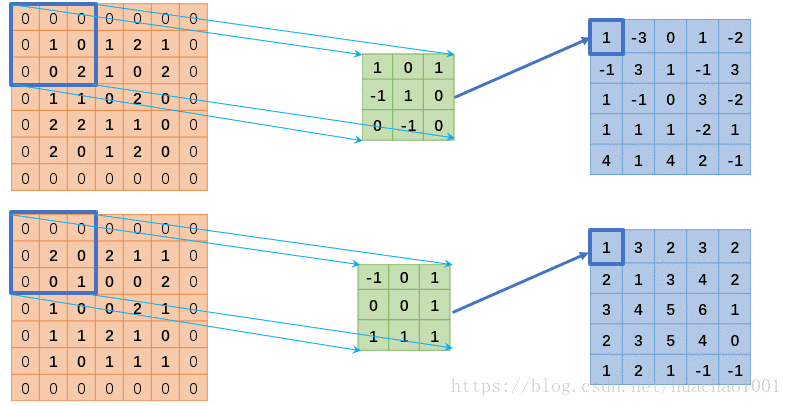

In [3]:
from IPython.display import Image
Image(filename="./mobilenet.gif")